# (Core) Preparing Time Series from Wide-Form Data

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks


## Task
### Part 1
#### Load in the Zillow Home Value Index dataframe

In [2]:
df_1  = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.zip", 
                    low_memory=False,compression='zip')
df_1.head(4)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


#### Filter the 4 largest cities into a new dataframe.

In [3]:
df = df_1.loc[0:3,:].copy()

In [4]:
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


#### Melt the data to long-form and prepare it for time series analysis

In [5]:
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [6]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','State', 'Metro'] )
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",CountyName,Queens County
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",CountyName,Los Angeles County
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",CountyName,Harris County
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",CountyName,Cook County
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",2000-01-31,253690.0
...,...,...,...,...,...,...,...,...,...
1091,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",2022-08-31,315587.0
1092,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",2022-09-30,781622.0
1093,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",2022-09-30,966595.0
1094,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",2022-09-30,272639.0


In [7]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    1096 non-null   int64 
 1   SizeRank    1096 non-null   int64 
 2   RegionName  1096 non-null   object
 3   RegionType  1096 non-null   object
 4   StateName   1096 non-null   object
 5   State       1096 non-null   object
 6   Metro       1096 non-null   object
 7   variable    1096 non-null   object
 8   value       1091 non-null   object
dtypes: int64(2), object(7)
memory usage: 77.2+ KB


- Since these values are the Zillow House Value Index, we will name this column ```"ZHVI"```.
- To simplify our output, we also decided to drop the ```'RegionID', 'SizeRank', 'StateName','State',``` and ```'Metro'``` values here.

In [8]:
melted = pd.melt(df.drop(columns=['RegionID', 'SizeRank', 'StateName','State', 'Metro']),
                 id_vars=['RegionName', 'RegionType'],
                value_name='ZHVI',var_name="Date")
melted

,RegionName,RegionType,Date,ZHVI
0,New York,city,CountyName,Queens County
1,Los Angeles,city,CountyName,Los Angeles County
2,Houston,city,CountyName,Harris County
3,Chicago,city,CountyName,Cook County
4,New York,city,2000-01-31,253690.0
...,...,...,...,...
1091,Chicago,city,2022-08-31,315587.0
1092,New York,city,2022-09-30,781622.0
1093,Los Angeles,city,2022-09-30,966595.0
1094,Houston,city,2022-09-30,272639.0


##### Doing some Data Clean Up
> Checking for incosistencies on 'RegionType'

In [9]:
melted['RegionType'].value_counts()

city    1096
Name: RegionType, dtype: int64

> We can drop this column

In [10]:
melted = melted.drop(['RegionType'], axis=1)

> Cheking for missing values

In [11]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionName  1096 non-null   object
 1   Date        1096 non-null   object
 2   ZHVI        1091 non-null   object
dtypes: object(3)
memory usage: 25.8+ KB


In [12]:
melted.isna().sum()

RegionName    0
Date          0
ZHVI          5
dtype: int64

> Missing vales are less that 1%, therefore should not affect the analisys

In [13]:
melted.dropna(inplace=True)

In [14]:
melted.isna().sum()

RegionName    0
Date          0
ZHVI          0
dtype: int64

##### Set Dat as index

In [15]:
melted['Date'].value_counts()

CountyName    4
2014-12-31    4
2015-06-30    4
2015-05-31    4
2015-04-30    4
             ..
2006-06-30    3
2002-05-31    3
2008-03-31    3
2008-04-30    3
2004-03-31    3
Name: Date, Length: 274, dtype: int64

> Removing rows with string ```'CountyName'```, and setting ```'Date'``` as index. We will make a copy to avoid data leakage and asisgn to melted_ready_df

In [16]:
melted = melted[~(melted['Date']=='CountyName')]

In [17]:
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 4 to 1095
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionName  1087 non-null   object        
 1   Date        1087 non-null   datetime64[ns]
 2   ZHVI        1087 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 34.0+ KB


In [18]:
melted_ready_df = melted[~(melted['Date']=='CountyName')].set_index("Date").copy()

In [19]:
melted_ready_df['RegionName'].unique()

array(['New York', 'Los Angeles', 'Houston', 'Chicago'], dtype=object)

> There are 4 unique cities included

In [20]:
melted_ready_df

,RegionName,ZHVI
Date,,
2000-01-31,New York,253690.0
2000-01-31,Los Angeles,234181.0
2000-01-31,Houston,109068.0
2000-01-31,Chicago,166139.0
2000-02-29,New York,255517.0
...,...,...
2022-08-31,Chicago,315587.0
2022-09-30,New York,781622.0
2022-09-30,Los Angeles,966595.0


##### Resample the dataframe as monthly frequency, grouped by City.

In [21]:
df_ts = melted_ready_df.groupby(['RegionName']).resample('MS').sum()
# Droping RegionName column
df_ts.drop(['RegionName'], axis=1, inplace=True)


In [22]:
df_ts.head().index

MultiIndex([('Chicago', '2000-01-01'),
            ('Chicago', '2000-02-01'),
            ('Chicago', '2000-03-01'),
            ('Chicago', '2000-04-01'),
            ('Chicago', '2000-05-01')],
           names=['RegionName', 'Date'])

### Part 2
#### Plot the home values for all 4 cities

In [23]:
cities = ['New York', 'Los Angeles', 'Houston', 'Chicago']
plot_df = df_ts.loc[cities].copy()
plot_df

ZHVI
RegionName Date                
New York   2000-01-01  253690.0
           2000-02-01  255517.0
           2000-03-01  257207.0
           2000-04-01  260310.0
           2000-05-01  263204.0
...                         ...
Chicago    2022-05-01  312487.0
           2022-06-01  314663.0
           2022-07-01  315910.0
           2022-08-01  315587.0
           2022-09-01  315429.0

[1092 rows x 1 columns]

In [24]:
# level 0 is Cities
plot_df.index.get_level_values(0)

Index(['New York', 'New York', 'New York', 'New York', 'New York', 'New York',
       'New York', 'New York', 'New York', 'New York',
       ...
       'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago', 'Chicago',
       'Chicago', 'Chicago', 'Chicago', 'Chicago'],
      dtype='object', name='RegionName', length=1092)

In [25]:
# level 1 is Date
plot_df.index.get_level_values(1)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1092, freq=None)

#### Applying unstack() for Our Visualization

In [26]:
unstacked = plot_df.unstack(level=0)
unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [27]:
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)

Text(0.5, 1.0, 'Zillow House Value Index (ZHVI)')

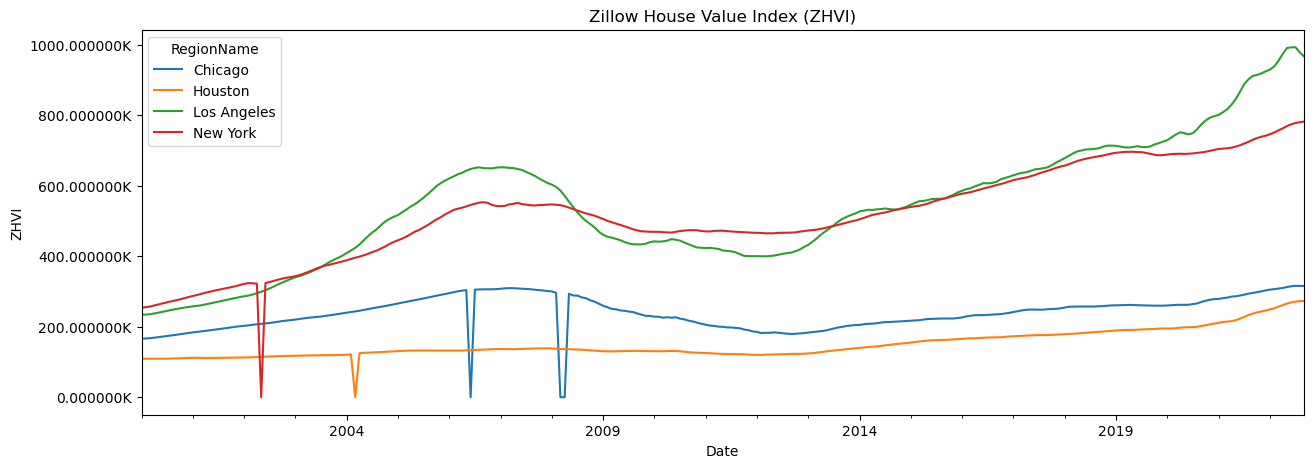

In [28]:
unstacked.columns

ax = unstacked['ZHVI'].plot(figsize=(15, 5))
ax.set_ylabel("ZHVI")
ax.yaxis.set_major_formatter(fmt_thous)
plt.title("Zillow House Value Index (ZHVI)")

 #### Q1: Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [29]:
max_date = df_ts.loc[pd.IndexSlice[:, '2008'],:].idxmax()
max_value = df_ts.loc[pd.IndexSlice[:, '2008'],:].max()

In [30]:
f"{max_value['ZHVI']:,}"


'603,029.0'

In [31]:
print(f"The City with the highest typical value was {max_date['ZHVI'][0]} inches, which occured on ${max_value['ZHVI']/1000:.0f}K.")

The City with the highest typical value was Los Angeles inches, which occured on $603K.


#### Q2: How much did the home values change from November 2008 to December 2008 (in dollars)?

In [32]:
value_change_2008 = df_ts.loc[pd.IndexSlice[:, '2008-12'],:].diff().sum()

In [33]:
print(f"home values change from November 2008 to December 2008 was ${value_change_2008['ZHVI']/1000:.0f}K")

home values change from November 2008 to December 2008 was $245K
